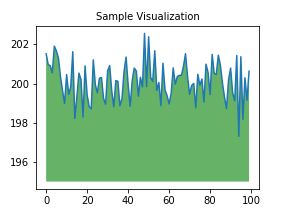

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from google.colab import files
uploaded = files.upload()


df=pd.read_csv('/content/Product_Reviews.csv')
df.head()

df = df.drop_duplicates()

df.duplicated().sum()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Saving Product_Reviews.csv to Product_Reviews.csv


np.int64(0)

FileNotFoundError: [Errno 2] No such file or directory: 'Product_Reviews.csv'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Saving Product_Reviews.csv to Product_Reviews (5).csv
Index(['Product ID', 'Product Review', 'Sentiment'], dtype='object')


,proportion
Sentiment,
POSITIVE,0.845771
NEUTRAL,0.080597
NEGATIVE,0.073632


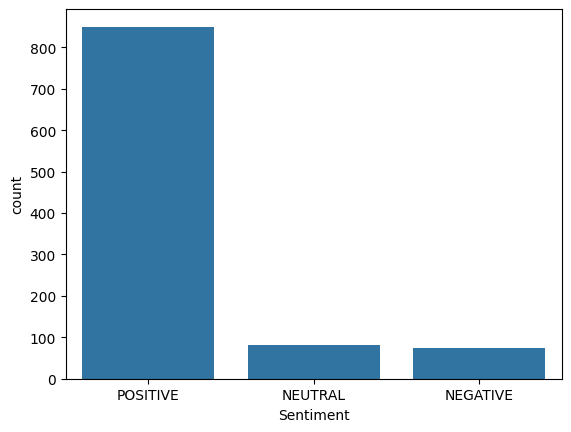

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from nltk.stem.porter import PorterStemmer

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from google.colab import files
uploaded = files.upload()


df=pd.read_csv('/content/Product_Reviews.csv')
df.head()
df = df.drop_duplicates()

df.duplicated().sum()
print(df.columns)
sns.countplot(data=df, x='Sentiment')
plt.show

df['Sentiment'].value_counts(normalize=True)


In [ ]:
def remove_special_characters(text):
  pattern = r'[^A-Za-z0-9\s]'
  new_text = re.sub(pattern, '', text)
  return new_text

In [ ]:
df['cleaned_text'] = df['Product Review'].apply(remove_special_characters)
df['cleaned_text'] = df['cleaned_text'].str.lower()
df['cleaned_text'] = df['cleaned_text'].str.strip()
df['cleaned_text_without_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

In [ ]:
df.loc[0:3, ['Product Review','cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 ive read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirsfast forward to today i have had a full week with my new kindle paperwhite and i have to admit im in love not just with the kind

In [ ]:
(df.loc[0:3, ['Product Review', 'cleaned_text']])

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 ive read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirsfast forward to today i have had a full week with my new kindle paperwhite and i have to admit im in love not just with the kind

In [ ]:
df.loc[0:3, ['Product Review', 'cleaned_text']]

,Product Review,cleaned_text
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about customs, which I may have if I used a third party shipping service.",i initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing the paperwhite is great but if you have spending money go for the voyagefortunately i had friends who owned each so i ended up buying the paperwhite on this basis both models now have 300 ppi so the 80 dollar jump turns out pricey the voyages page press isnt always sensitive and if you are fine with a specific setting you dont need auto light adjustmentits been a week and i am loving my paperwhite no regrets the touch screen is receptive and easy to use and i keep the light at a specific setting regardless of the time of day in any case its not hard to change the setting either as youll only be changing the light level at a certain time of day not every now and then while readingalso glad that i went for the international shipping option with amazon extra expense but delivery was on time with tracking and i didnt need to worry about customs which i may have if i used a third party shipping service
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Brave New World, and a few other key titles. Fair to say my Nook did not get as much use as many others may have gotten from theirs.Fast forward to today. I have had a full week with my new Kindle Paperwhite and I have to admit, I'm in love. Not just with the Kindle, but with reading all over again! Now let me relate this review, love, and reading all back to the Kindle. The investment of 139.00 is in the experience you will receive when you buy a Kindle. You are not simply paying for a screen there is an entire experience included in buying from Amazon.I have been reading The Hunger Games trilogy and shall be moving onto the Divergent series soon after. Here is the thing with the Nook that hindered me for the past 4 years: I was never inspired to pick it up, get it into my hands, and just dive in. There was never that feeling of oh man, reading on this thing is so awesome. However, with my Paperwhite, I now have that feeling! That desire is back and I simply adore my Kindle. If you are considering purchasing one, stop thinking about it simply go for it. After a full week, 3 downloaded books, and a ton of reading, I still have half of my battery left as well.Make yourself happy. Inspire the reader inside of you.",allow me to preface this with a little history i am was a casual reader who owned a nook simple touch from 2011 ive read the harry potter series girl with the dragon tattoo series 1984 brave new world and a few other key titles fair to say my nook did not get as much use as many others may have gotten from theirsfast forward to today i have had a full week with my new kindle paperwhite and i have to admit im in love not just with the kind

In [ ]:
def remove_stopwords(text):
  words = text.split()
  new_text = ' '.join([word for word in words if word not in stopwords.words('english')])
  return new_text

In [ ]:
df['cleaned_text_without_stopwords']

,cleaned_text_without_stopwords
0,initially trouble deciding paperwhite voyage reviews less said thing paperwhite great spending money go voyagefortunately friends owned ended buying paperwhite basis models 300 ppi 80 dollar jump turns pricey voyages page press isnt always sensitive fine specific setting dont need auto light adjustmentits week loving paperwhite regrets touch screen receptive easy use keep light specific setting regardless time day case hard change setting either youll changing light level certain time day every readingalso glad went international shipping option amazon extra expense delivery time tracking didnt need worry customs may used third party shipping service
1,allow preface little history casual reader owned nook simple touch 2011 ive read harry potter series girl dragon tattoo series 1984 brave new world key titles fair say nook get much use many others may gotten theirsfast forward today full week new kindle paperwhite admit im love kindle reading let relate review love reading back kindle investment 13900 experience receive buy kindle simply paying screen entire experience included buying amazoni reading hunger games trilogy shall moving onto divergent series soon thing nook hindered past 4 years never inspired pick get hands dive never feeling oh man reading thing awesome however paperwhite feeling desire back simply adore kindle considering purchasing one stop thinking simply go full week 3 downloaded books ton reading still half battery left wellmake happy inspire reader inside
2,enjoying far great reading original fire since 2012 fire used make eyes hurt read long havent experienced paperwhite yet
3,bought one first paperwhites pleased constant companion suppose ive read average book every three days past however many years wouldnt give youd pry cold dead fingersfor sundry logistical reasons ive also made good use amazons kindle app iphone paperwhite screen naturally cool usability delivers works well attractions companion kindleof course aspects paperwhite would like critique ah knew coming somewhere didnt youas member bookbub get daily list alerts book deals chosen genres take many however ive found even best world cant keep days seems every book read ive bought two theres much good stuff accumulative effect number books actually paperwhite creeping ever upward time 400with mind ive noticed pageturning remained exactly every action kindle become positively glacial slow slow think malfunctioning general consensus appears expected one many books downloaded onto kindle begin behave flakey manner drives mad amazon states hold thousands books believe figure would need second paperwhite read im waiting actions complete first oneread
4,say upfront dont like coroporate hermetically closed stuff like anything apple case amazon like devices put anything want use buti fairly happy user nook touch several years couldnt use functionalities since live serbia lost nook since devices actually fully used serbia buying books using online capabilities except kindle since one except amazon ships serbia since ive actually happy amazon customer since 2005 friends accounts since 2007 since kindle definitely best technology buy itso read many reviews screenlight paperwhite similar devices problem mine light disperses fine except black blotches maybe see picture bottom screen actually shadows black plastic casing thus cant really avoided see picture without light blotches light outthe paperwhites screen marvelous 300 ppi touchscreen works fine store works serbia two days ive using im happy guyi get hang make sideloaded books behave least almost like amazon books thats fine thats one thing id like see amazon future upgrades make kindle treat sideloaded books like ones bought directly sharing funcion quotes goodreads enabled onthe size perfect sits well hand light doesnt hurt eyes dark like light tab packaging fine problems remains seen battery lifeso far recommend
...,...
1002,remote got alexaecho doesnt control volum

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
words = ["running", "studies", "files", "easily", "happiness"]
for word in words:
  print(f"{word} -> {stemmer.stem(word)}")

running -> run
studies -> studi
files -> file
easily -> easili
happiness -> happi


In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
words = ["running", "studies", "files", "easily", "better", "happiness"]
for word in words:
  print(f"{word} -> {lemmatizer.lemmatize(word)}")

running -> running
studies -> study
files -> file
easily -> easily
better -> better
happiness -> happiness


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("running studies flies better happiness")
for token in doc:
  print(f"{token.text} ({token.pos_} -> {token.lemma_})")

running (VERB -> run)
studies (NOUN -> study)
flies (VERB -> fly)
better (ADJ -> well)
happiness (NOUN -> happiness)


In [ ]:
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
from google.colab import files

nltk.download('stopwords')

uploaded = files.upload()

df = pd.read_csv('/content/Product_Reviews.csv')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text_without_stopwords'] = df['Product Review'].apply(clean_text)

bow_vec = CountVectorizer(max_features=1000)
df_features_BOW = bow_vec.fit_transform(df['cleaned_text_without_stopwords'])
df_features_BOW = df_features_BOW.toarray()

words = bow_vec.get_feature_names_out()
print("Shape of BOW:", df_features_BOW.shape)
print("First 10 words:", words[:10])

df_BOW = pd.DataFrame(df_features_BOW, columns=words)
df_BOW.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving Product_Reviews.csv to Product_Reviews.csv
Shape of BOW: (1007, 1000)
First 10 words: ['10' '100' '139' '15' '16level' '20' '2013' '2014' '2015' '2nd']


,10,100,139,15,16level,20,2013,2014,2015,2nd,...,write,writing,wrong,year,years,yes,yet,youll,youre,youtube
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=1000)
data_features_tfidf=tfidf.fit_transform(df['cleaned_text_without_stopwords'])
data_features_tfidf=data_features_tfidf.toarray()
print("shape of the feature vector",data_features_tfidf.shape)
words=tfidf.get_feature_names_out()
print("first 10 words",words[:10])
print("last 10 words"[10:])
df_tfidf=pd.DataFrame(data_features_tfidf, columns=tfidf.get_feature_names_out())
df_tfidf.head()

shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '139' '15' '16level' '20' '2013' '2014' '2015' '2nd']
rds


,10,100,139,15,16level,20,2013,2014,2015,2nd,...,write,writing,wrong,year,years,yes,yet,youll,youre,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.139439,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.072328,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.288218,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.070352,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.054600,0.0,0.000000,0.000000,0.0,0.0


In [ ]:
ngram = CountVectorizer(max_features=1000,ngram_range=(1,2))
data_features_ngram=ngram.fit_transform(df['cleaned_text_without_stopwords'])
data_features_ngram=data_features_ngram.toarray()
print("shape of the feature vector",data_features_ngram.shape)
words=ngram.get_feature_names_out()
print("first 10 words",words[:10])
print("last 10 words"[10:])
df_ngram=pd.DataFrame(data_features_ngram, columns=ngram.get_feature_names_out())
df_ngram.head()

shape of the feature vector (1007, 1000)
first 10 words ['10' '100' '15' '20' '2013' '2014' '2015' '2nd' '30' '300']
rds


,10,100,15,20,2013,2014,2015,2nd,30,300,...,year,year old,years,years model,yes,yet,youll,youre,youre reading,youtube
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


bow_vec = CountVectorizer(max_features=1000)
df_features_BOW = bow_vec.fit_transform(df['cleaned_text_without_stopwords'])
df_BOW = pd.DataFrame(df_features_BOW.toarray(), columns=bow_vec.get_feature_names_out())

tfidf = TfidfVectorizer(max_features=1000)
data_features_tfdif = tfidf.fit_transform(df['cleaned_text_without_stopwords'])
df_tfidf = pd.DataFrame(data_features_tfdif.toarray(), columns=tfidf.get_feature_names_out())


vectorized_datasets = [
    ("BoW", df_BOW),
    ("TF-IDF", df_tfidf),
    ("N-gram", df_ngram)
]


y = df['Sentiment']


results = []


for name, X in vectorized_datasets:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


    rf_model = RandomForestClassifier(random_state=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    rf_f1 = f1_score(y_test, rf_preds, average='macro')
    results.append((f"RandomForest - {name}", rf_f1, rf_model, X_test, y_test, rf_preds))


    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_preds = nb_model.predict(X_test)
    nb_f1 = f1_score(y_test, nb_preds, average='macro')
    results.append((f"NaiveBayes - {name}", nb_f1, nb_model, X_test, y_test, nb_preds))


results.sort(key=lambda x: x[1], reverse=True)


print("\n Model Performance (Macro F1-scores):\n")
for label, f1_score_val, _, _, _, _ in results:
    print(f"{label:30s}: Macro F1 = {f1_score_val:.4f}")


 Model Performance (Macro F1-scores):

NaiveBayes - N-gram           : Macro F1 = 0.5664
NaiveBayes - BoW              : Macro F1 = 0.5590
RandomForest - BoW            : Macro F1 = 0.5006
RandomForest - N-gram         : Macro F1 = 0.5006
RandomForest - TF-IDF         : Macro F1 = 0.4979
NaiveBayes - TF-IDF           : Macro F1 = 0.3339



Best Model: NaiveBayes - N-gram with Macro F1 = 0.5664
Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       0.62      0.56      0.59        18
     NEUTRAL       0.22      0.21      0.22        19
    POSITIVE       0.89      0.90      0.89       165

    accuracy                           0.81       202
   macro avg       0.58      0.56      0.57       202
weighted avg       0.80      0.81      0.80       202



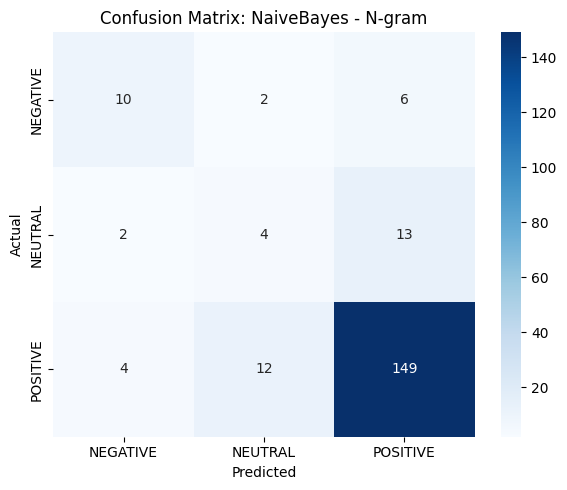

In [ ]:
best_model_label, best_f1, best_model, X_test_best, y_test_best, y_pred_best = results[0]
print(f"\nBest Model: {best_model_label} with Macro F1 = {best_f1:.4f}")
print("Classification Report:\n")
print(classification_report(y_test_best, y_pred_best))

cm=confusion_matrix(y_test_best, y_pred_best, labels=best_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title(f"Confusion Matrix: {best_model_label}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()